# SVM 预测特征值绝对值的 min 和 mplt 的结果

测量指标为 预测结果与真实结果之间的百分误差

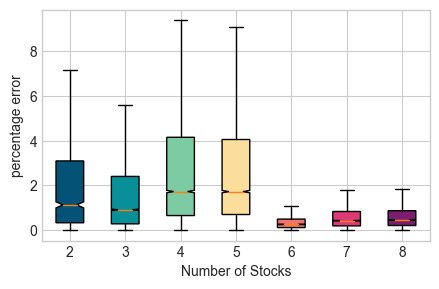

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 存储所有数据的列表
data_list = []

# 读取每个CSV文件，提取指定列数据，并添加到列表中
start_num, end_num = 2, 9
for num_assets in range(start_num, end_num):  
    filename = f'result/SVM/test_result_mplt_{num_assets}_tickers.csv'
    df = pd.read_csv(filename)
    data = df['percentage'].apply(abs)
    bound = 100
    #data = data[(data >= -bound) & (data <= bound)]
    data_list.append(data)

# 绘制箱线图
fig, plt = plt.subplots(figsize=(5, 3)) 
bplot = plt.boxplot(
    data_list,
    notch=True, # 是否绘制缺口
    showfliers=False,
    
    #medianprops={'color': 'blue', 'linewidth': 2},
    #meanprops={'color': 'blue', 'linewidth': 2},
    #showmeans=True, # 是否显示平均值的标记符号
    meanline=True,
    meanprops={'color': 'purple', 'linewidth': 1.5, 'linestyle': '--'},

    patch_artist=True,  # fill with color
)

colors = [
    (4, 82, 117),
    (8, 144, 153),
    (124, 203, 162),
    (252, 222, 156),
    (240, 116, 110),
    (220, 57, 119),
    (124, 29, 111),
]
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.set_xticklabels([str(i) for i in range(start_num, end_num)])
plt.ypltis.grid(True)
plt.xlabel('Number of Stocks')
plt.ylabel('percentage error')  # TODO 改名字
# plt.title('Boxplot')

# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"image/SVM/boxplot_mplt.pdf"
plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')

# 显示图形
plt.show()


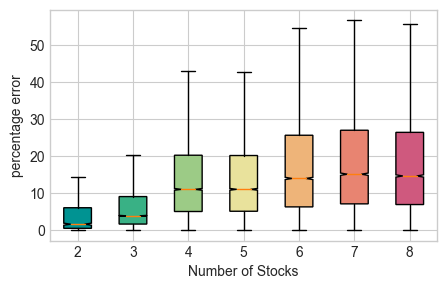

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 存储所有数据的列表
data_list = []

# 读取每个CSV文件，提取指定列数据，并添加到列表中
start_num, end_num = 2, 9
for num_assets in range(start_num, end_num):
    filename = f'result/SVM/test_result_min_{num_assets}_tickers_more.csv'
    df = pd.read_csv(filename)
    data = df['percentage'].apply(abs)
    # data = abs(df['min'] - df['pred_min'])/df['pred_min']
    bound = 100
    #data = data[(data >= -bound) & (data <= bound)]
    data_list.append(data)

# 绘制箱线图
fig, plt = plt.subplots(figsize=(5, 3))
bplot = plt.boxplot(
    data_list,
    notch=True, # 是否绘制缺口
    showfliers=False,
    
    #medianprops={'color': 'blue', 'linewidth': 2},
    #meanprops={'color': 'blue', 'linewidth': 2},
    #showmeans=True, # 是否显示平均值的标记符号
    meanline=True,
    meanprops={'color': 'purple', 'linewidth': 1.5, 'linestyle': '--'},

    patch_artist=True,  # fill with color
)

colors = [
    (0, 147, 146),
    (57, 177, 133),
    (156, 203, 134),
    (233, 226, 156),
    (238, 180, 121),
    (232, 132, 113),
    (207, 89, 126),
]
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.set_xticklabels([str(i) for i in range(start_num, end_num)])

plt.ypltis.grid(True)
plt.xlabel('Number of Stocks')
plt.ylabel('percentage error')  # TODO 改名字
# plt.title('Boxplot')

# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"image/SVM/boxplot_min.pdf"
plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')

# 显示图形
plt.show()


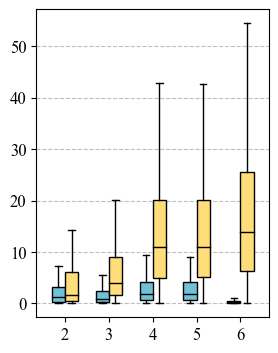

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 存储所有数据的列表
data_list_max = []
data_list_min = []

# 读取每个CSV文件，提取指定列数据，并添加到列表中
start_num, end_num = 2, 7
main_width = 0.3
plt.figure(figsize=(3, 4))
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Times New Roman'
# 处理第一个箱线图数据
for num_assets in range(start_num, end_num):  
    filename = f'result/SVM/test_result_max_{num_assets}_tickers.csv'
    df = pd.read_csv(filename)
    data = df['percentage'].apply(abs)
    data_list_max.append(data)

# 处理第二个箱线图数据
for num_assets in range(start_num, end_num):
    filename = f'result/SVM/test_result_min_{num_assets}_tickers_more.csv'
    df = pd.read_csv(filename)
    data = df['percentage'].apply(abs)
    data_list_min.append(data)

# 创建图形


# 计算箱线图的位置
positions_max = [pos for pos in range(start_num, end_num)]
positions_min = [pos + main_width for pos in range(start_num, end_num)]

# 绘制第一个箱线图
bplot1 = plt.boxplot(
    data_list_max,
    positions=positions_max,
    widths=main_width,
    # notch=True,
    showfliers=False,
    meanline=True,
    medianprops={'color': 'black'},
    patch_artist=True,
)

colors1 = [(255 , 221, 121), (112, 193, 214)]
colors1 = [(r / 255, g / 255, b / 255) for r, g, b in colors1]  # Adding alpha value for transparency

for patch in bplot1['boxes']:
    patch.set_facecolor(colors1[1])

# 绘制第二个箱线图
bplot2 = plt.boxplot(
    data_list_min,
    positions=positions_min,
    widths=main_width,
    # notch=True,
    showfliers=False,
    meanline=True,
    medianprops={'color': 'black'},
    patch_artist=True,
)

for patch in bplot2['boxes']:
    patch.set_facecolor(colors1[0])

plt.xticks([tmp + main_width/2 for tmp in range(start_num, end_num)])
# plt.xticks([])
# 设置图像的分辨率
# dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"image/SVM/combined_boxplots.pdf"
# plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')
# plt.yscale('log')
# plt.ylim(-5, 100)
# 显示图形
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.grid(axis='x', linestyle='', alpha=0.6)
# plt.grid(axis='x')
plt.savefig('p4.svg', format='svg', bbox_inches='tight')

plt.show()
